# Librivox metadata

In [3]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from matplotlib import rcParams
import seaborn as sns
import numpy as np
import datetime as dt
from bs4 import BeautifulSoup
import requests


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plt.rcParams.update(params)

#add data path
path='../data/'

/Users/saijananiganesan/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Useful functions

In [4]:
def fetch_and_clean_data(path=path,fname='librivox_synopsis_df_genre.csv'):
    df=pd.read_csv(path+fname)
    cleaned=df.drop('Unnamed: 0',1)
    cleaned=cleaned[cleaned['Language']=="English"]
    return cleaned


In [7]:
df=fetch_and_clean_data()
df.info()
len(df['Book Name'].unique())
df['URL'].unique()[0]
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12946 entries, 0 to 12945
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Book Name      12946 non-null  object
 1   Book Synopsis  12915 non-null  object
 2   Language       12946 non-null  object
 3   URL            12427 non-null  object
 4   Time           12420 non-null  object
 5   Authors        12946 non-null  object
 6   Genre          12946 non-null  object
dtypes: object(7)
memory usage: 809.1+ KB


12805

'https://librivox.org/letters-of-two-brides-by-honore-de-balzac/'

,Book Name,Book Synopsis,Language,URL,Time,Authors,Genre
0,Letters of Two Brides,Letters of Two Brides is an epistolary novel. ...,English,https://librivox.org/letters-of-two-brides-by-...,9:09:20,Honoré de Balzac,Epistolary Fiction
1,Bleak House,<p>Bleak House is the ninth novel by Charles D...,English,https://librivox.org/bleak-house-by-charles-di...,43:30:19,Charles Dickens,General Fiction
2,Penguin Island,<p>The novel (original French title -- L'Île d...,English,https://librivox.org/penguin-island-by-anatole...,9:04:31,Anatole France,Satire
3,This Side of Paradise,<p>This Side of Paradise is the debut novel of...,English,https://librivox.org/this-side-of-paradise-by-...,8:56:24,F. Scott Fitzgerald,Published 1900 onward
4,Secret Garden,"Mary Lennox is a spoiled, middle-class, self-c...",English,https://librivox.org/the-secret-garden-by-fran...,9:08:25,Frances Hodgson Burnett,Children's Fiction
...,...,...,...,...,...,...,...
12941,Neighbourhood – A Year’s Life in and About an ...,If you love the quiet of the country - the rea...,English,NaN,NaN,Tickner Edwardes,None
12942,"History of New England, 1630-1649",NaN,English,NaN,NaN,John Winthrop,None
12943,Vietnam: The advisory years to 1965,This book explains the policy of the United St...,English,NaN,NaN,Robert Futrell,None
12944,"Short Nonfiction Collection, Vol. 077",- Summary by Sue Anderson,English,NaN,NaN,Various,None


### A quick overview of the dataset. 


In [50]:
def apply_cat(cat):
    if 'fiction' in cat.lower():
        return 'Fiction'
    elif 'poetry' in cat.lower():
        return 'Poetry'
    elif 'histor' in cat.lower():
        return 'History'
    elif 'health' in cat.lower():
        return 'Health&Fitness'
    elif 'humor' in cat.lower():
        return 'Humor'
    elif 'law' in cat.lower():
        return 'Law'
    elif 'published' in cat.lower():
        return 'None'
    elif 'bible' in cat.lower():
        return 'Christianity'
    elif 'christ' in cat.lower():
        return 'Christianity'
    else:
        return cat
    
df['Categories']=df['Genre'].apply(apply_cat)
df

,Book Name,Book Synopsis,Language,URL,Time,Authors,Genre,Categories
0,Letters of Two Brides,Letters of Two Brides is an epistolary novel. ...,English,https://librivox.org/letters-of-two-brides-by-...,9:09:20,Honoré de Balzac,Epistolary Fiction,Fiction
1,Bleak House,<p>Bleak House is the ninth novel by Charles D...,English,https://librivox.org/bleak-house-by-charles-di...,43:30:19,Charles Dickens,General Fiction,Fiction
2,Penguin Island,<p>The novel (original French title -- L'Île d...,English,https://librivox.org/penguin-island-by-anatole...,9:04:31,Anatole France,Satire,Satire
3,This Side of Paradise,<p>This Side of Paradise is the debut novel of...,English,https://librivox.org/this-side-of-paradise-by-...,8:56:24,F. Scott Fitzgerald,Published 1900 onward,None
4,Secret Garden,"Mary Lennox is a spoiled, middle-class, self-c...",English,https://librivox.org/the-secret-garden-by-fran...,9:08:25,Frances Hodgson Burnett,Children's Fiction,Fiction
...,...,...,...,...,...,...,...,...
12941,Neighbourhood – A Year’s Life in and About an ...,If you love the quiet of the country - the rea...,English,NaN,NaN,Tickner Edwardes,None,None
12942,"History of New England, 1630-1649",NaN,English,NaN,NaN,John Winthrop,None,None
12943,Vietnam: The advisory years to 1965,This book explains the policy of the United St...,English,NaN,NaN,Robert Futrell,None,None
12944,"Short Nonfiction Collection, Vol. 077",- Summary by Sue Anderson,English,NaN,NaN,Various,None,None


In [59]:
categories=df.groupby(['Categories']).count().reset_index().sort_values(by='Book Name',ascending=False)

categories = categories.drop(categories[categories.Genre ==' '].index)

categories['Categories'].unique()

array(['Fiction', 'Poetry', 'None', 'Christianity',
       ' Myths, Legends & Fairy Tales', 'History',
       ' Biography & Autobiography', ' Single author',
       ' Animals & Nature', ' Action & Adventure', ' Short Stories',
       ' Essays & Short Works', ' Romance', ' Anthologies',
       ' Travel & Geography', ' General', ' Plays', ' Memoirs',
       ' Tragedy', ' War & Military', ' Single Author Collections',
       ' Comedy', ' Nature', ' Religion', ' Family', ' Early Modern',
       ' Ancient', ' King James Version', ' Modern (19th C)', 'Humor',
       ' Short works', ' Political Science',
       " Young's Literal Translation", ' Satire', ' Westerns', ' Cooking',
       ' Drama', ' Other religions', 'Law', ' Antiquity', ' Modern',
       ' Self-Help', ' Science',
       ' Social Science (Culture & Anthropology)', ' Philosophy',
       ' Exploration', ' True Crime', ' ', ' Literary Collections',
       ' Plays, Satire',
       ' War & Military, Biography & Autobiography, Politic

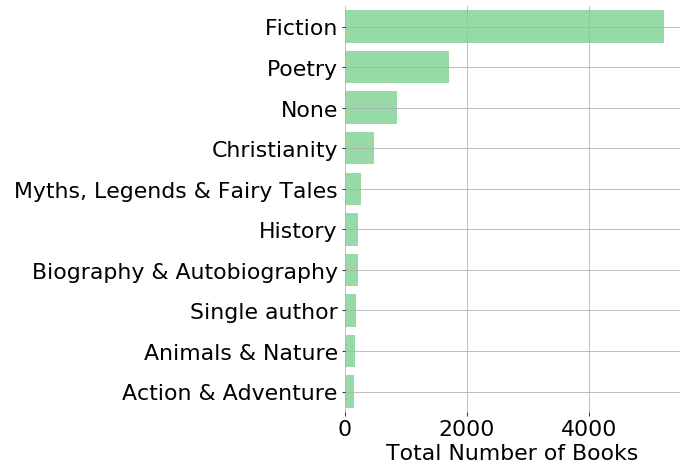

In [64]:
f, ax1 = plt.subplots(1,1,figsize=(10, 7));
sns.set_color_codes("pastel");
sns.barplot(x="Book Name", y="Categories", data=categories.iloc[:10,:], color="g",ax=ax1);
ax1.set(ylabel="",xlabel="Total Number of Books",title='');
ax1.grid(True);
plt.tight_layout();
sns.despine(left=True, bottom=True);
